## 使用PyWGCNA的模块特征关系（MTR）
在识别出共表达模块后，我们可以计算出具有特征的模块特征基因，以了解每个模块的同一性。
在这本笔记本中，我想展示一下如何连接它们。

首先，我建议在元数据中包含分类数据，以便更好地解释热图。例如，如果你只有两个类别，根据数据中指定的顺序，第一个类别映射为零，另一个映射为一，所以如果没有指定顺序，你需要查看其他图表，如module_barplot，以便能够解释正相关和负相关。

如果你有两个以上的变量，PyWGCNA会将每个项目视为一个bool trait。
有时，你有一个变量，比如年龄，你想调查你模块中的时间进程。在这种情况下，表示这一点的列应该包含数值。

大多数时候，你的模块在多个特征之间存在相关性，如果你分别计算每个特征的相关性，你就无法捕捉到这些相关性。为了实现这些，我建议在`self.datExpr.obs`中添加另一列，并指定适合您数据的数据类型。


In [1]:
import PyWGCNA
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")
pyWGCNA_5xFAD.save = False

Reading 5xFAD WGCNA done!


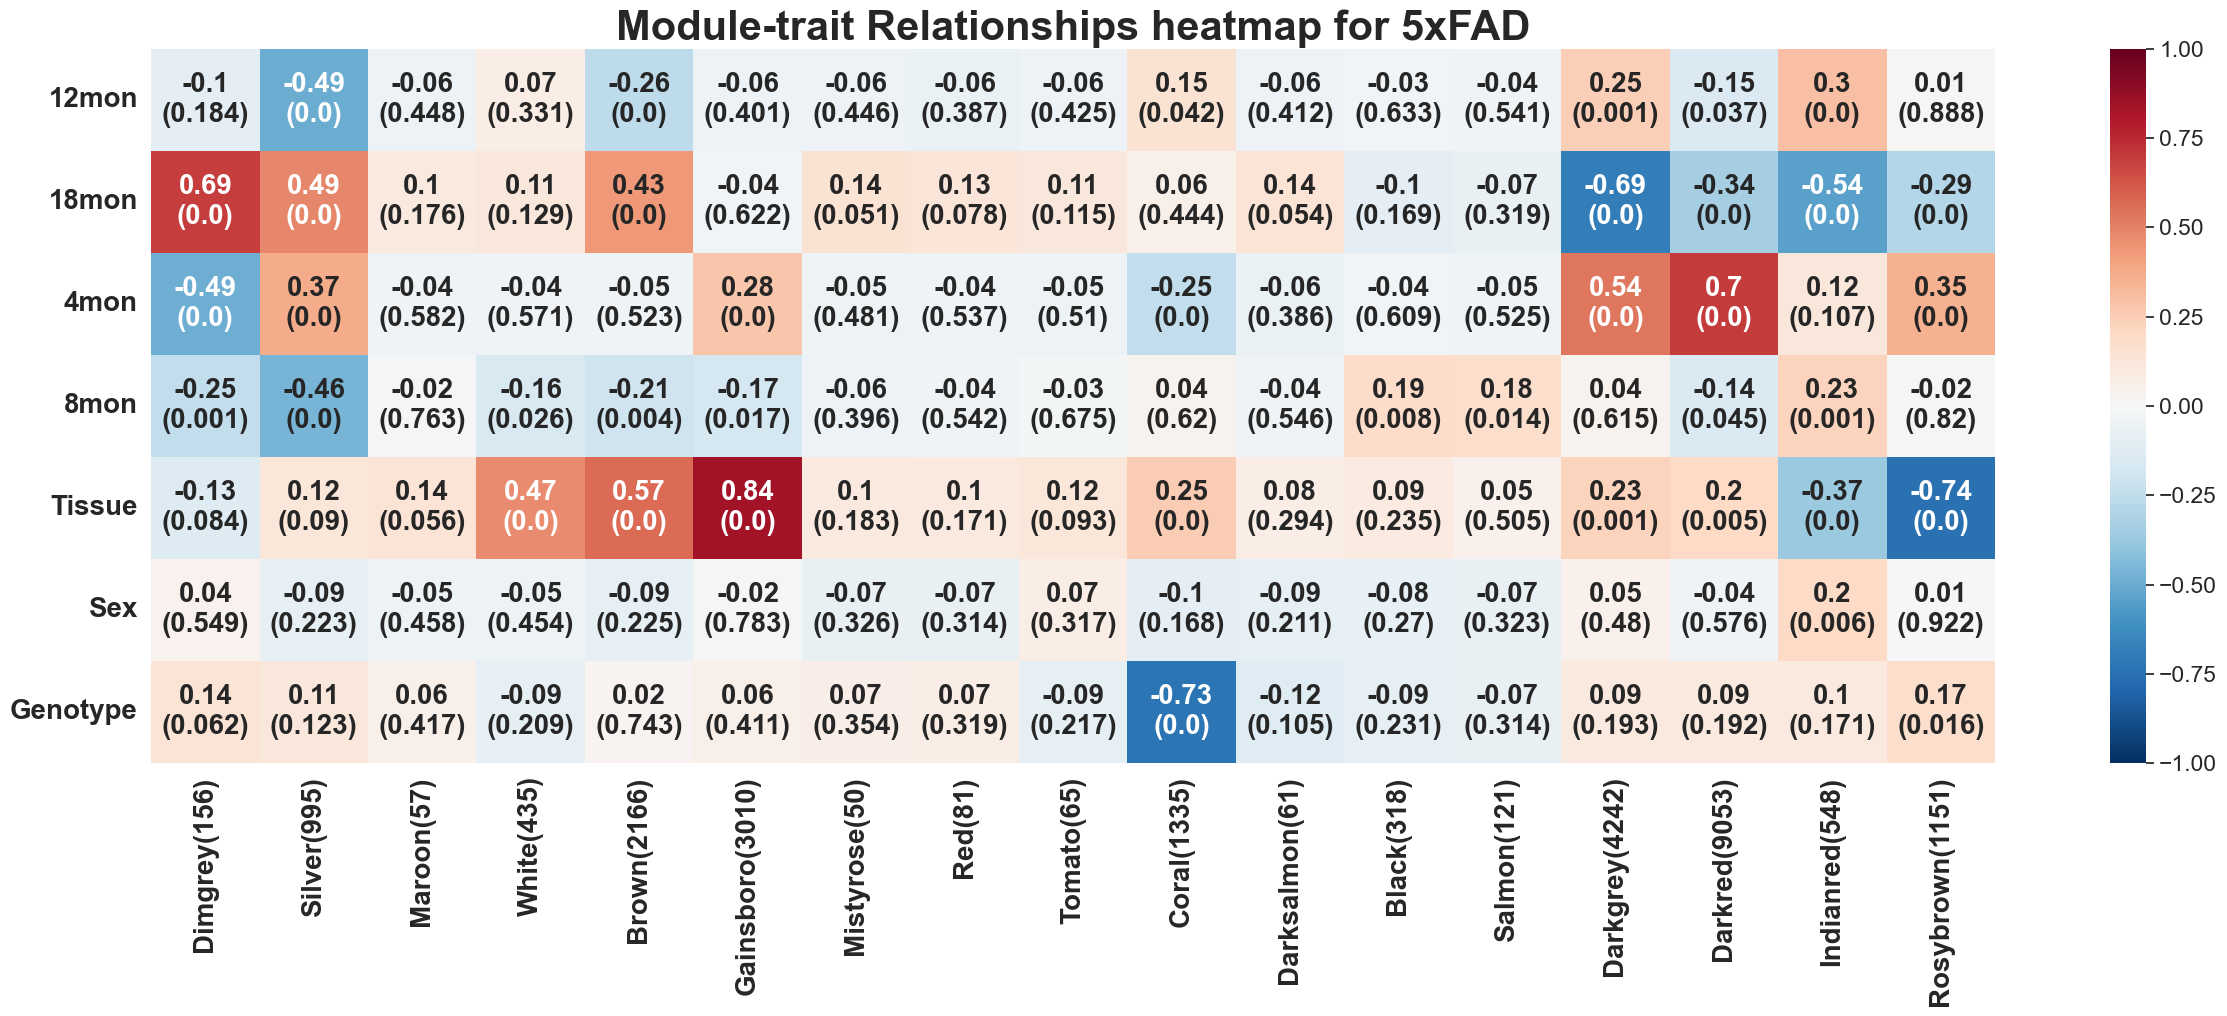

In [7]:
pyWGCNA_5xFAD.module_trait_relationships_heatmap(metaData=['Age', 'Tissue', 'Sex', 'Genotype'],
                                                 alternative='two-sided')

如果我们想查看模块特征关系热图中的行中的年龄，我们应该更改年龄的dtype。

在这里，您可以看到与较晚时间点相关性较高的模块呈正相关，而与较早时间点相关性较低的模块呈负相关。

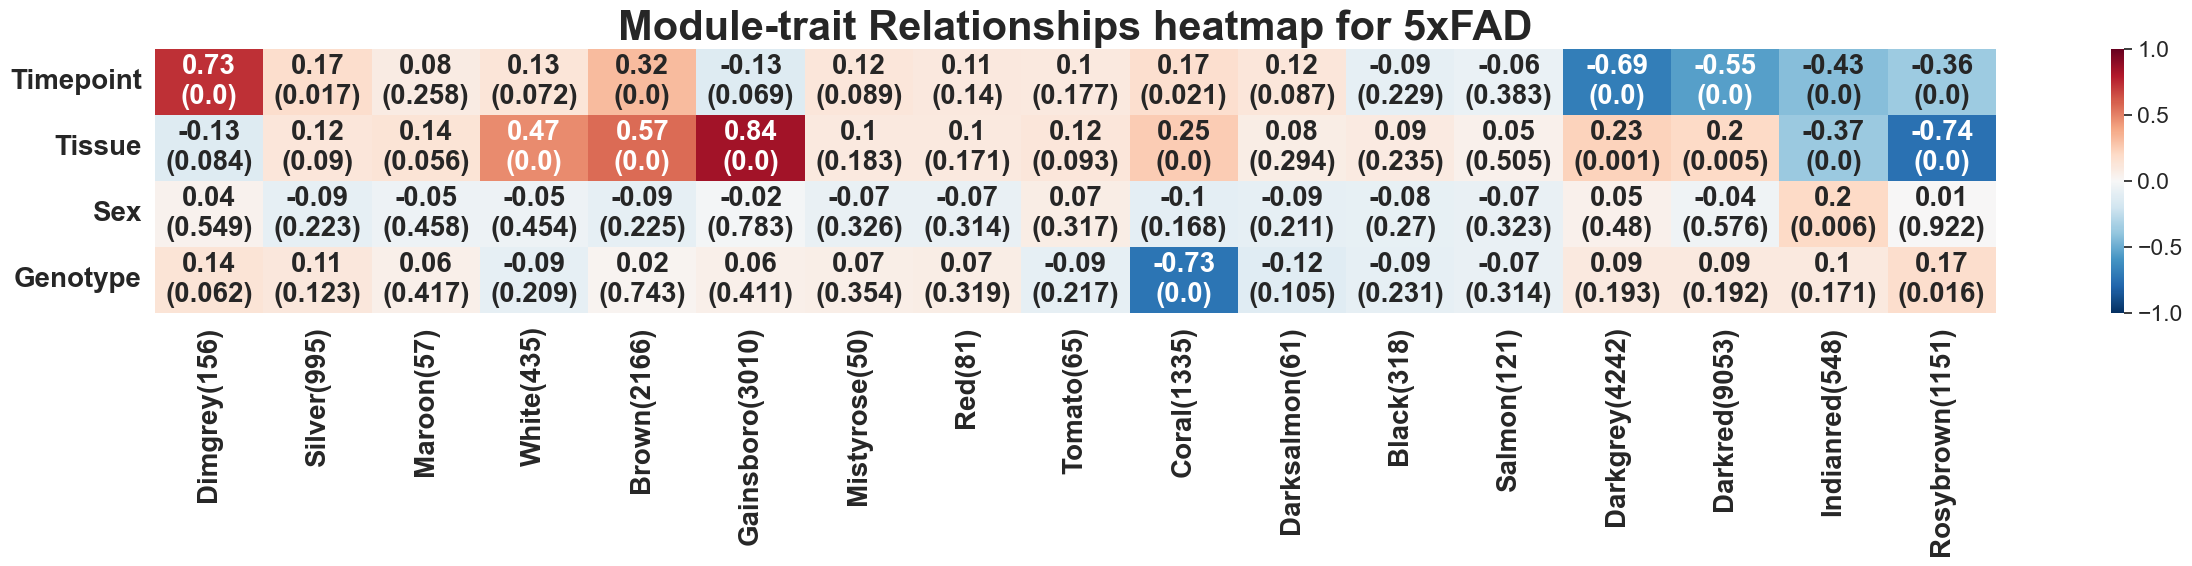

In [3]:
pyWGCNA_5xFAD.datExpr.obs['Timepoint'] = pyWGCNA_5xFAD.datExpr.obs.Age
pyWGCNA_5xFAD.datExpr.obs['Timepoint'].replace({'4mon': '4',
                                                '8mon': '8',
                                                '12mon': '12',
                                                '18mon': '18'}, inplace=True)
pyWGCNA_5xFAD.datExpr.obs['Timepoint'] = pyWGCNA_5xFAD.datExpr.obs['Timepoint'].astype('int')
pyWGCNA_5xFAD.module_trait_relationships_heatmap(metaData=['Timepoint', 'Tissue', 'Sex', 'Genotype'],
                                                 alternative='two-sided')

如果你想同时调查年龄和性别的影响，你应该添加一个包含这两种信息的列。

在下图中，尽管银模块似乎与4个月的样本呈正相关，但似乎它主要与女性4个月而不是男性相关。

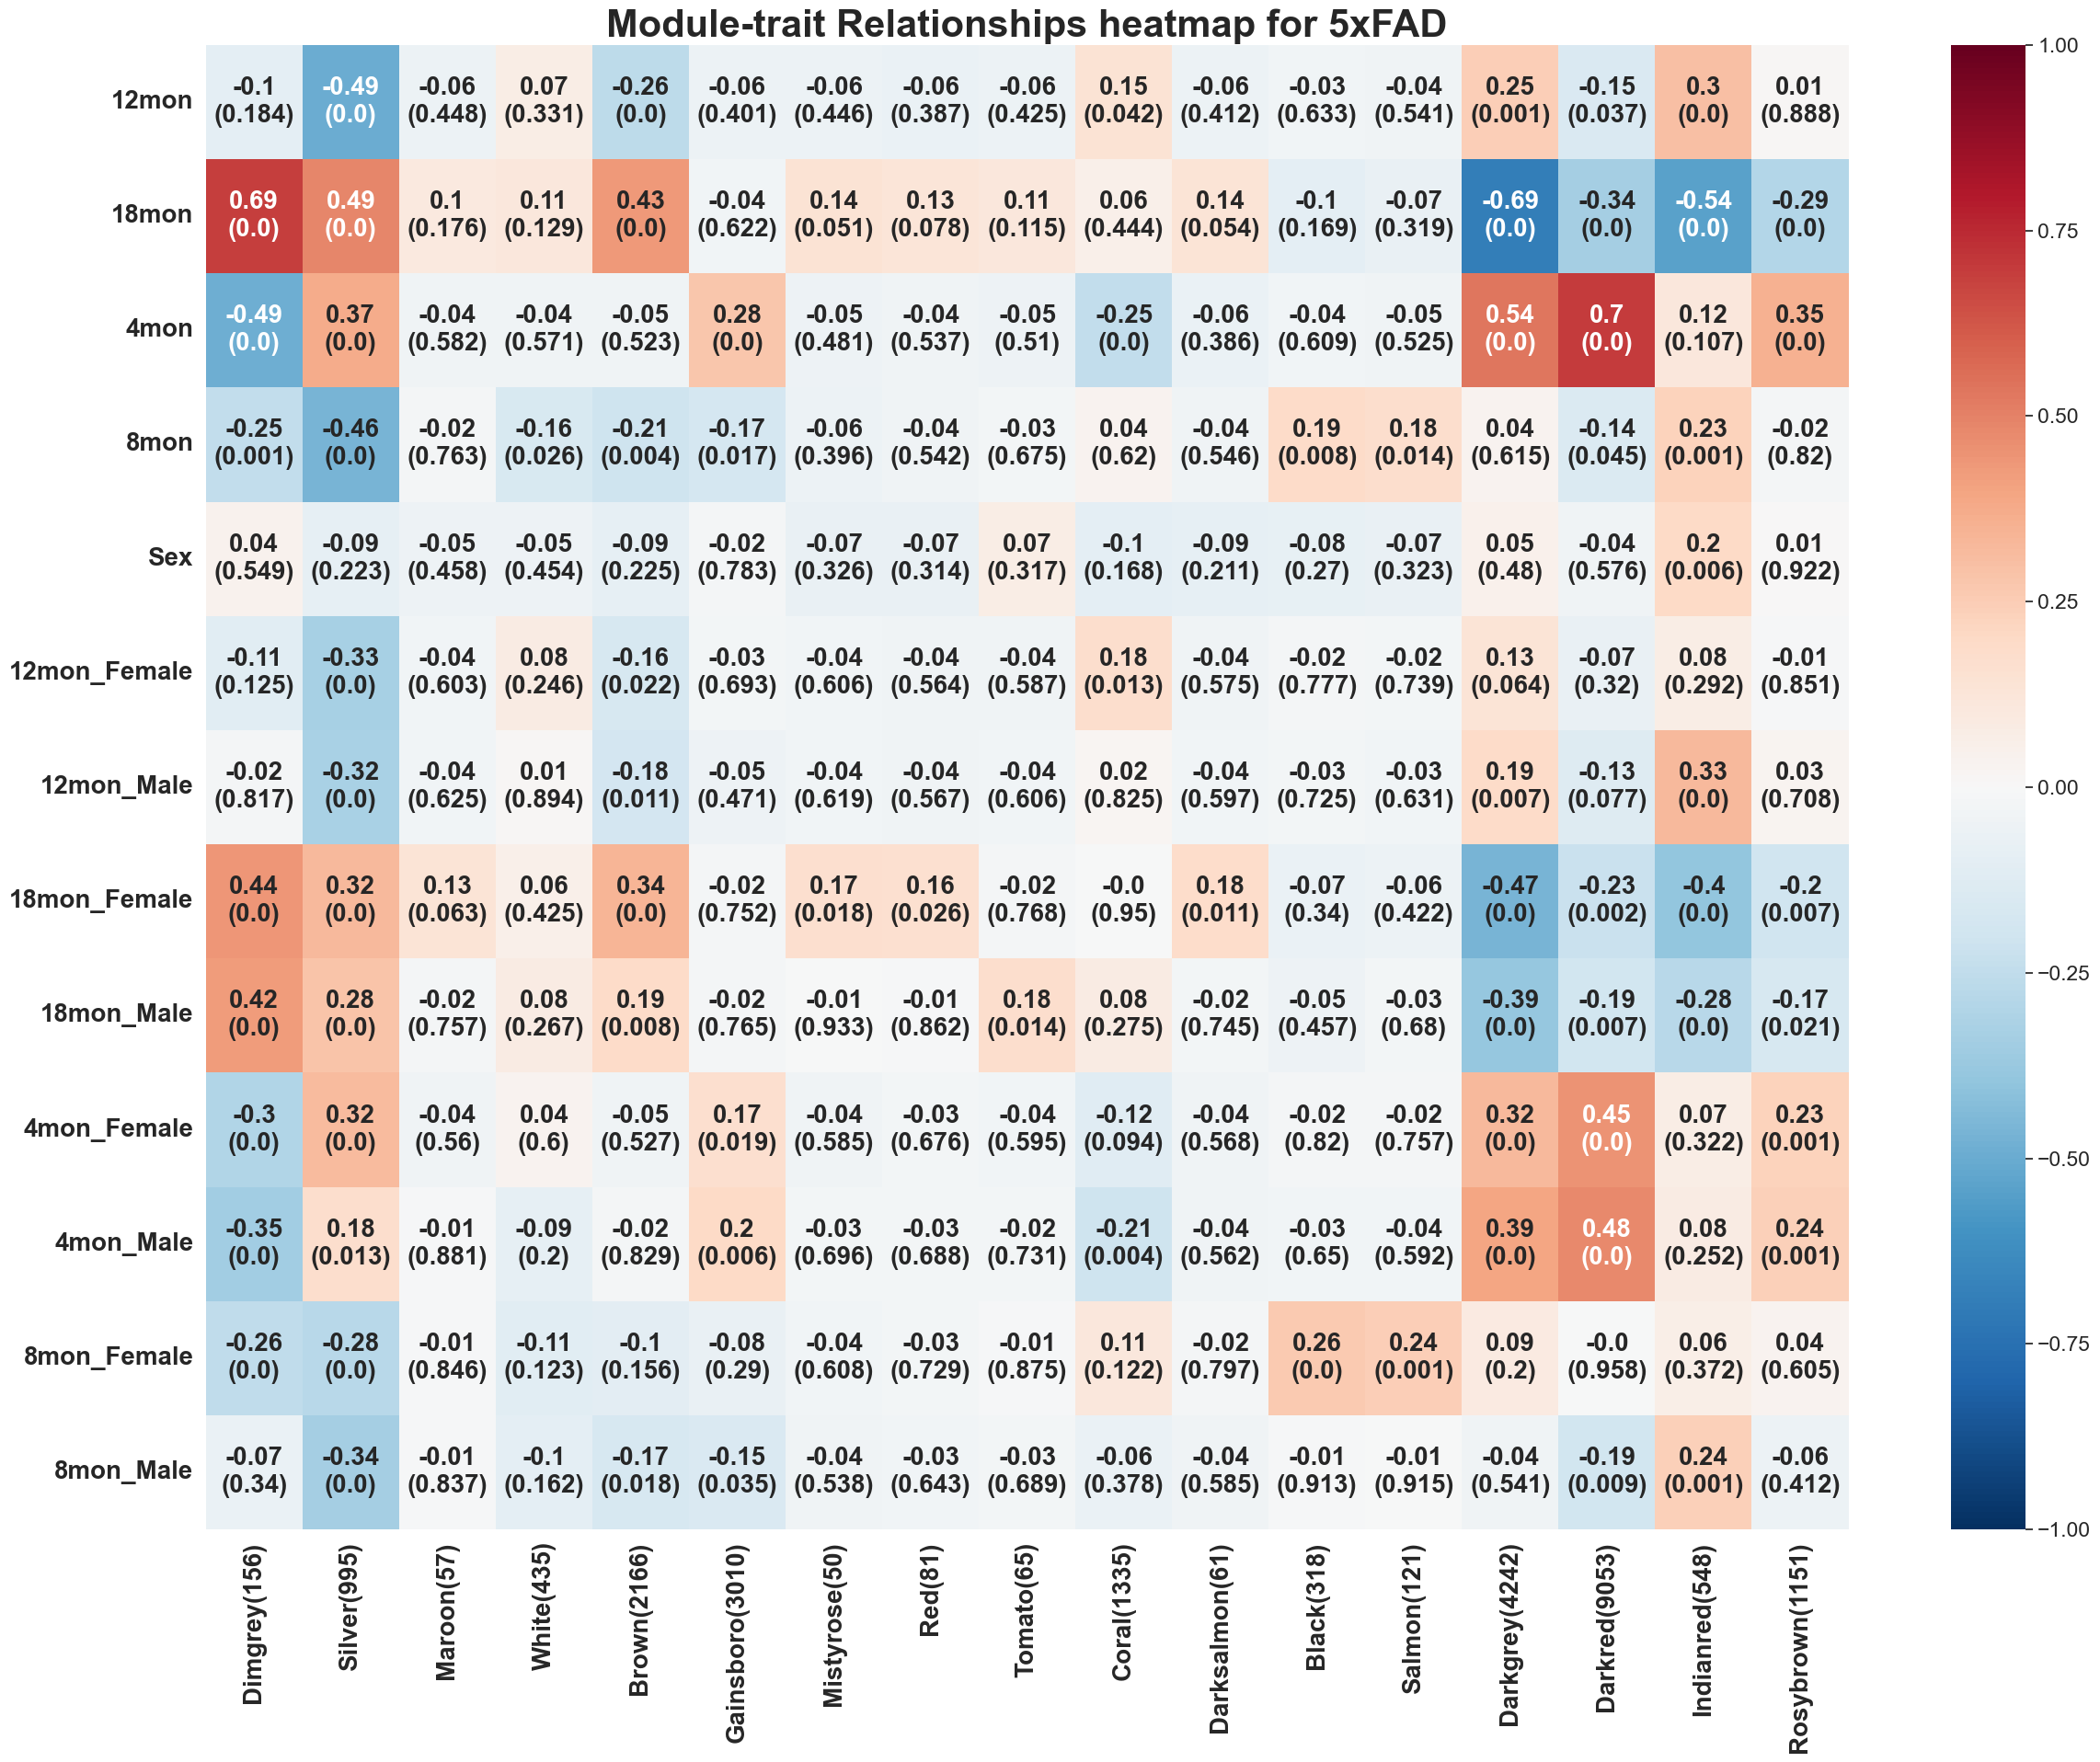

In [6]:
pyWGCNA_5xFAD.datExpr.obs['Age_Sex'] = pyWGCNA_5xFAD.datExpr.obs['Age'] + "_"+ pyWGCNA_5xFAD.datExpr.obs['Sex']
pyWGCNA_5xFAD.module_trait_relationships_heatmap(metaData=['Age', 'Sex', 'Age_Sex'],
                                                 alternative='two-sided')